# **9. Manipulating Time Series Data in Python**

## Chapter 1 - Working with Time Series in Pandas

In this course you'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series. Finally, you'll use all your new skills to build a value-weighted stock index from actual stock data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

Your first time series


In [2]:
seven_days = pd.date_range(start='2017-1-1',periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


Create a time series of air quality data


In [3]:
#reading file "NYC"
data = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\air_quality_data\\nyc.csv')

# Inspect data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [4]:

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])


In [5]:

# Set date column as index
data.set_index('date', inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


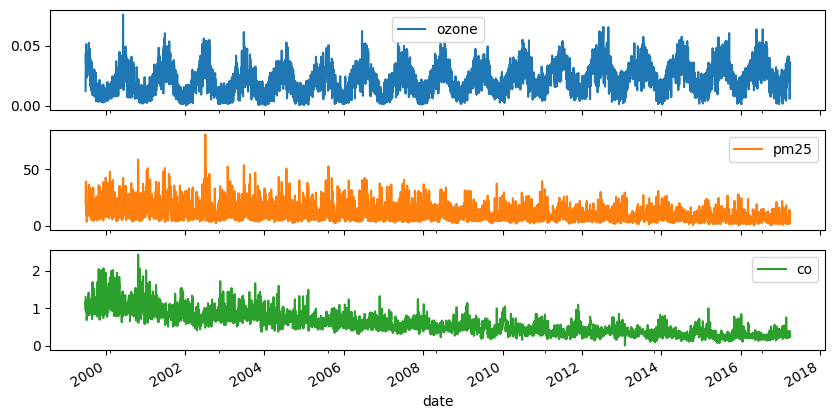

In [6]:

# Inspect data
print(data.info())

# Plot data
data.plot(subplots=True);
plt.show()

Compare annual stock price trends


In [7]:
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\yahoo.csv', parse_dates=['date'], index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


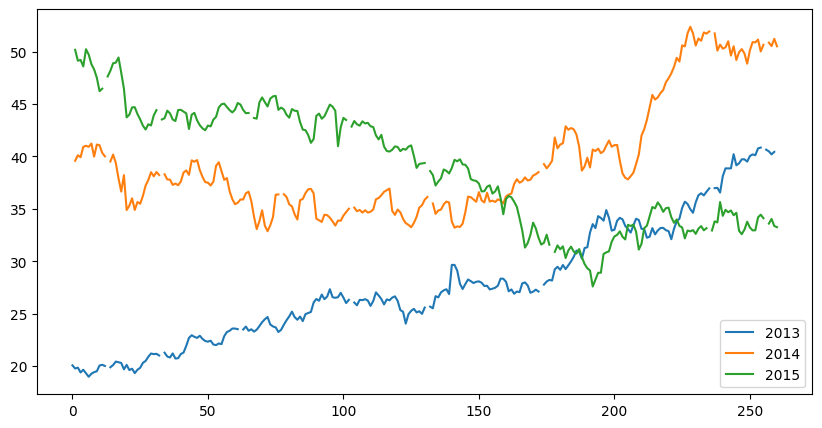

In [8]:
yahoo = df
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.plot()
plt.show()

In [9]:
print(prices.head())


    2013   2014   2015
0  20.08    NaN    NaN
1  19.78  39.59  50.17
2  19.86  40.12  49.13
3  19.40  39.93  49.21
4  19.66  40.92  48.59


Set and change time series frequency


In [10]:
co = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\air_quality_data\\co_cities.csv')
co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace=True)
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


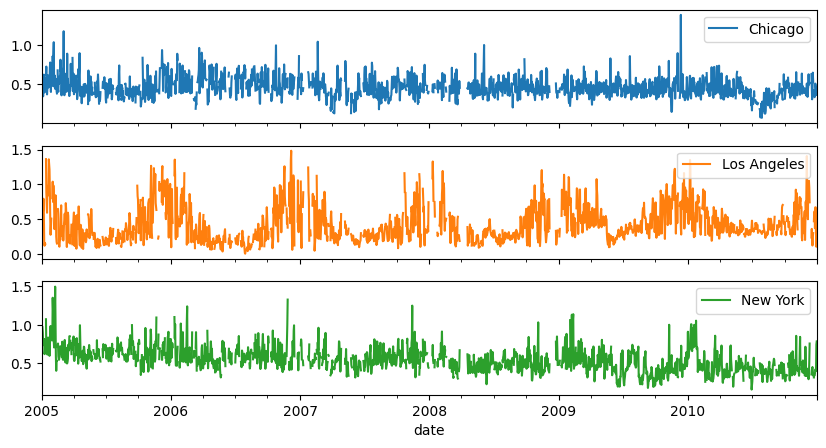

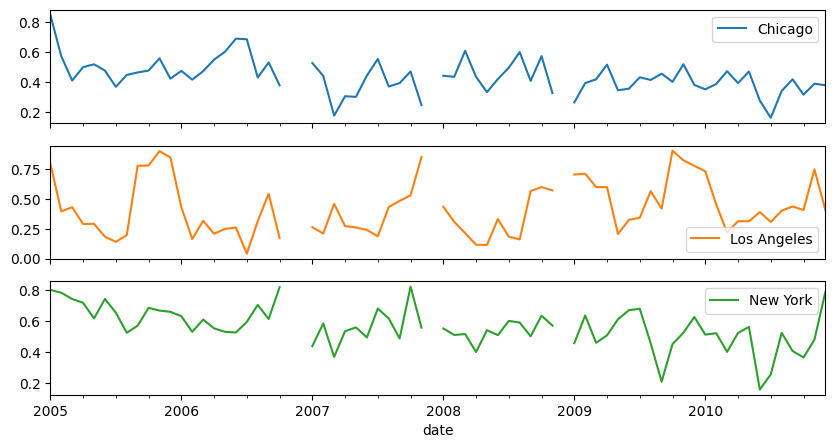

In [11]:
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True);
plt.show()

# Set Frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()

Shifting stock prices across time


c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be remove

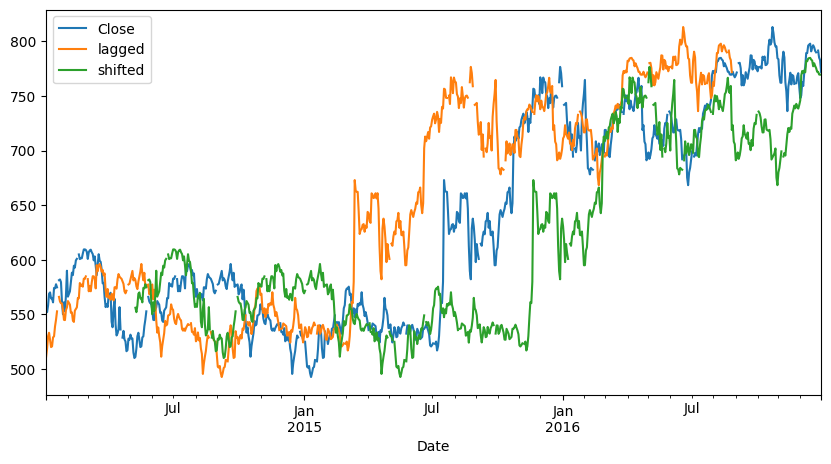

In [12]:
google = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google['Close'].shift(periods=-90)
google['shifted'] = google['Close'].shift(periods=90)

# Plot the google price series
google.plot();
plt.savefig('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\images\\google_lagged.png')


Calculating stock price changes


In [13]:
yahoo = yahoo.asfreq('B')

In [14]:
yahoo['shifted_30'] = yahoo['price'].shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo['price'].diff(periods=30)

# Inspect the last five rows of price
print(yahoo['price'].tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['diff_30'].sub(yahoo['change_30']).value_counts())

date
2015-12-25      NaN
2015-12-28    33.60
2015-12-29    34.04
2015-12-30    33.37
2015-12-31    33.26
Freq: B, Name: price, dtype: float64
0.0    703
Name: count, dtype: int64


Plotting multi-period returns


In [15]:
google = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('D')

C:\Users\yeiso\AppData\Local\Temp\ipykernel_19956\207313826.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  google['daily_return'] = google['Close'].pct_change(periods=1) * 100
C:\Users\yeiso\AppData\Local\Temp\ipykernel_19956\207313826.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  google['monthly_return'] = google['Close'].pct_change(periods=30) * 100
C:\Users\yeiso\AppData\Local\Temp\ipykernel_19956\207313826.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  google['annual_return'

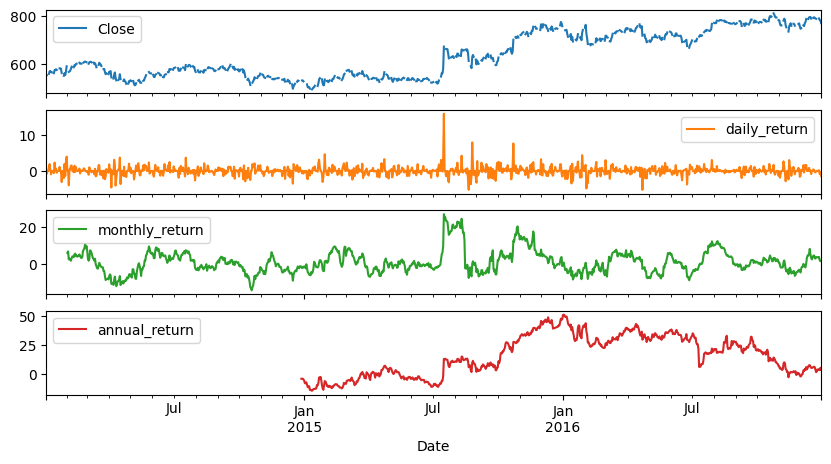

In [16]:
google['daily_return'] = google['Close'].pct_change(periods=1) * 100

# Create monthly_return
google['monthly_return'] = google['Close'].pct_change(periods=30) * 100

# Create annual_return
google['annual_return'] = google['Close'].pct_change(periods=360) * 100

# Plot the result
google.plot(subplots=True);

## Chapter 2 - Basic Time Series Metrics & Resampling

This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.



Compare the performance of several asset classes


In [17]:
# Import data here
# Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' 
#  column and set this column as the index, then assign the result to prices.
path = 'C:/Users/yeiso/OneDrive - Douglas College/0. DOUGLAS COLLEGE/3. Fund Machine Learning/0. Python Course DataCamp/Course-fundamentals-of-Machine-Learning/9. Manipulating Time Series Data in Python/datasets/stock_data/'
prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


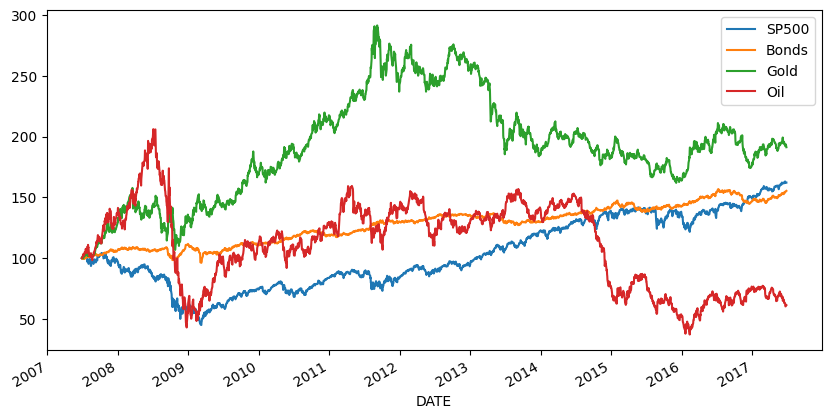

In [18]:
# Import data here
prices = pd.read_csv(path+'asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()


**Comparing stock prices with a benchmark**

Compare the performance of various stocks against a benchmark. Learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

Company (Stock Ticker):

Johnson & Johnson (JNJ)
Exxon Mobil (XOM)
JP Morgan Chase (JPM)

In [19]:
# Import stock prices and index here
stocks = pd.read_csv(path+'nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(path+'dow_jones.csv', parse_dates=['date'], index_col='date')

In [20]:
stocks.head()


,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [21]:
dow_jones.head()


,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


In [22]:
# Concatenate data and inspect result here
# Use pd.concat() along axis=1 to combine stocks and dow_jones 
#  and assign the result to data. Inspect the .info() of data.
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02
2010-01-06,64.45,43.92,70.02,10573.68
2010-01-07,63.99,44.79,69.80,10606.86
2010-01-08,64.21,44.68,69.52,10618.19


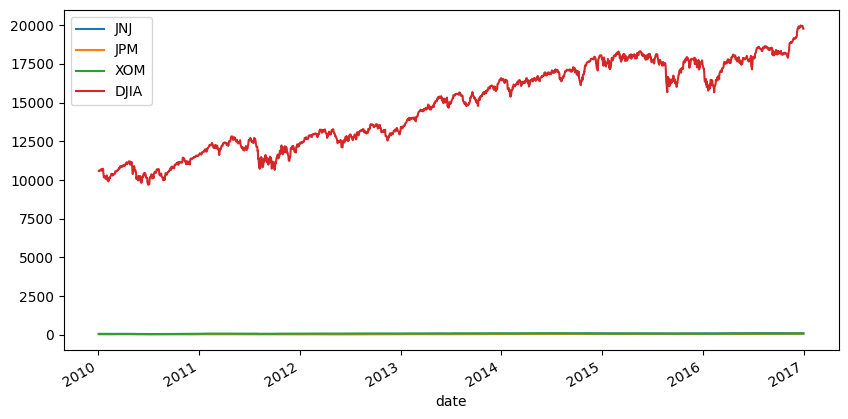

In [23]:
data.plot()
plt.show();

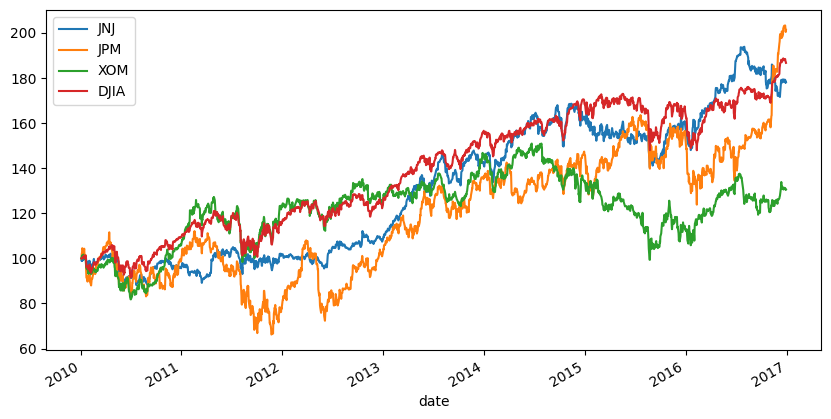

In [24]:
# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show();

Plot performance difference vs benchmark index


In [25]:
# Import stock data here
stocks = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\msft_aapl.csv', parse_dates=['date'], index_col='date')
stocks.head()

,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64
2007-01-08,12.21,29.93
2007-01-09,13.22,29.96


In [26]:
# Import index here
sp500 = pd.read_csv(path+'sp500.csv', parse_dates=['date'], index_col='date')
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [27]:
# Concatenate stocks and index here
# Use pd.concat() to concatenate stocks and sp500 along axis=1, 
#  apply .dropna() to drop all missing values, and assign the result to data.
data = pd.concat([stocks, sp500], axis=1).dropna()
data.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,17.43,29.47,1503.35
2007-07-02,17.32,29.74,1519.43
2007-07-03,18.17,30.02,1524.87
2007-07-05,18.96,29.99,1525.40
2007-07-06,18.90,29.97,1530.44


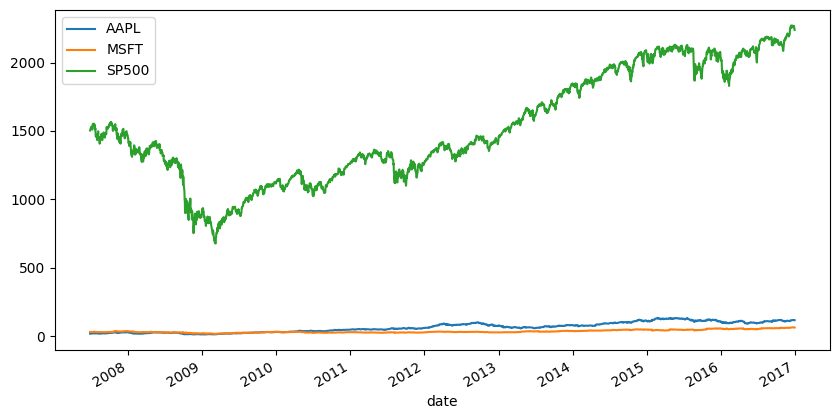

In [28]:
data.plot()
plt.show();

In [29]:
# Normalize data
normalized = data.div(data.iloc[0]).mul(100)
normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


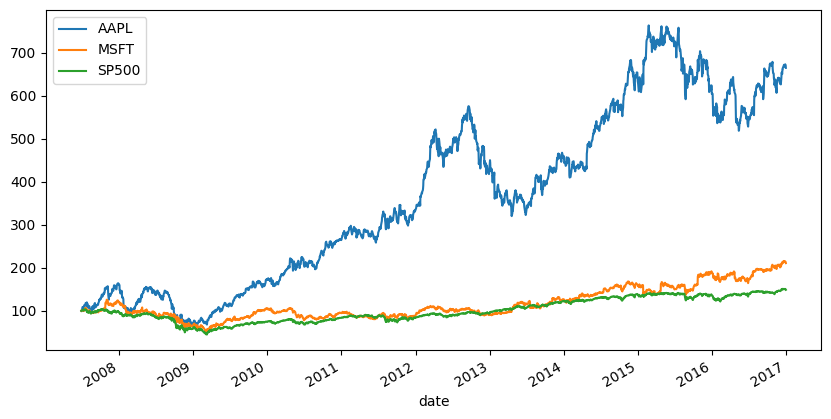

In [30]:
normalized.plot()
plt.show();

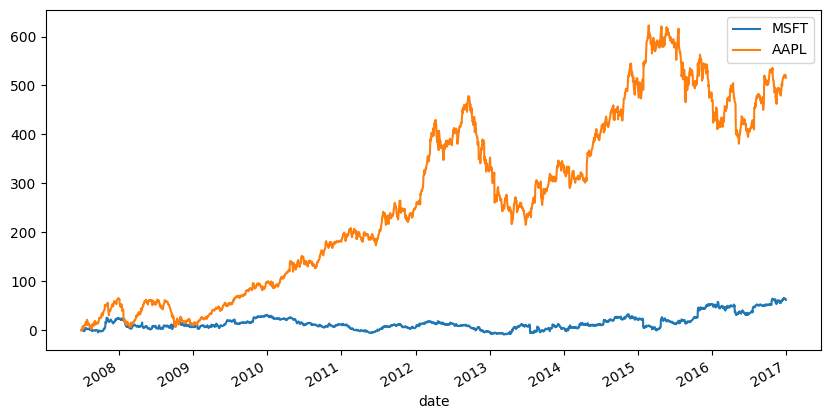

In [31]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Subtract the normalized index from the normalized stock prices, and plot the result
# Select tickers from normalized, and subtract normalized['SP500'] 
#  with keyword axis=0 to align the indexes, then plot the result.
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show();

*Now you can compare these stocks to the overall market so you can more easily spot trends and outliers.*



Convert monthly to weekly data


In [32]:
import pandas as pd

# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

In [33]:

# Create monthly_dates here
# Create monthly_dates using pd.date_range with start, 
#  end and frequency alias 'M'.
monthly_dates = pd.date_range(start=start, end=end, freq='M')
print(monthly_dates)

DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')


In [34]:
# Create and print monthly here
# Create and print the pd.Series monthly, passing the list [1, 2] 
#  as the data argument, and using monthly_dates as index.
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [35]:

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')
print(weekly_dates)

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28'],
              dtype='datetime64[ns]', freq='W-SUN')


In [36]:

# Print monthly, reindexed using weekly_dates
# Apply .reindex() to monthly three times: first without additional options, 
#  then with ffill and then with bfill, print()-ing each result.
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [37]:
print(monthly.reindex(weekly_dates, method='bfill'))


2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [38]:
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


**Create weekly from monthly unemployment data**


In [39]:

# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\debt_unemployment.csv', parse_dates=['date'], index_col='date')
#df.drop(['Debt/GDP'], axis=1, inplace=True)
df.head()

,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


all example complete!!!

            Debt/GDP  Unemployment
date                              
2010-01-03       NaN           NaN
2010-01-10       NaN           NaN
2010-01-17       NaN           NaN
2010-01-24       NaN           NaN
2010-01-31       NaN           NaN
            Debt/GDP  Unemployment
date                              
2010-01-03       NaN           9.8
2010-01-10       NaN           9.8
2010-01-17       NaN           9.8
2010-01-24       NaN           9.8
2010-01-31       NaN           9.8
            Debt/GDP  Unemployment
date                              
2010-01-03  87.00386           9.8
2010-01-10  87.00386           9.8
2010-01-17  87.00386           9.8
2010-01-24  87.00386           9.8
2010-01-31  87.00386           9.8


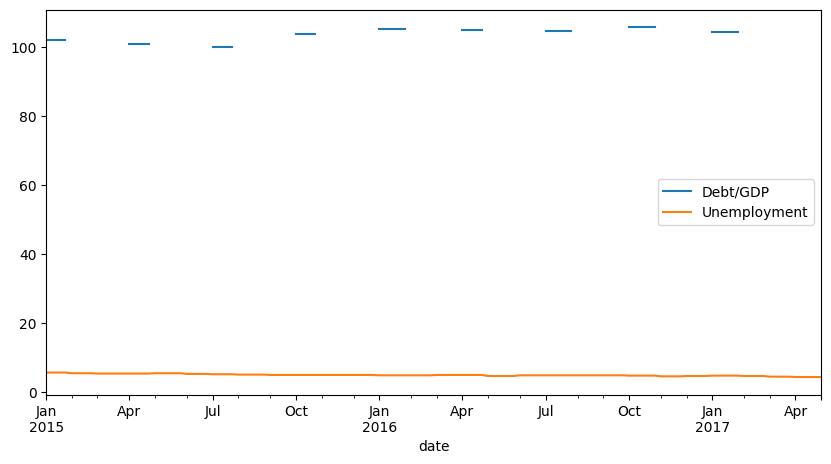

In [40]:
# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\debt_unemployment.csv', parse_dates=['date'], index_col='date')
data=df

# Show first five rows of weekly series
print(data.asfreq('W').head(5))

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head(5))

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show();



Use interpolation to create weekly employment data


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\debt_unemployment.csv', parse_dates=['date'], index_col='date')
#df.drop(['Debt/GDP'], axis=1, inplace=True)
df.head()

,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


In [42]:
monthly = df
# Inspect data here
print(monthly.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


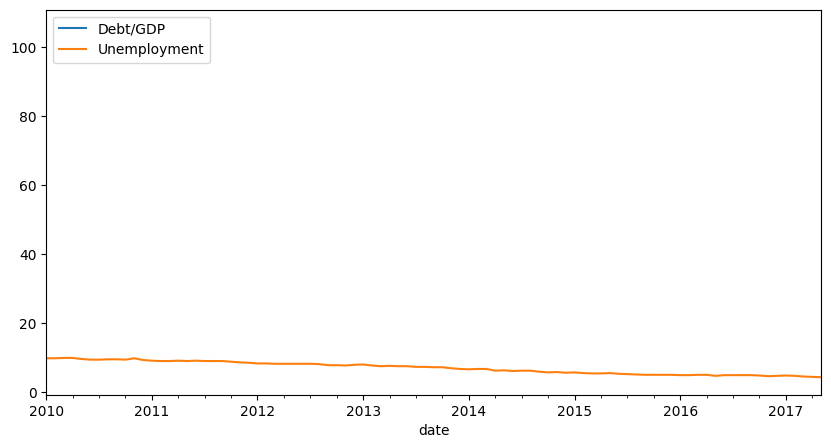

In [43]:
monthly.plot()
plt.show();


In [44]:
# Create weekly dates
# Create a pd.date_range() with weekly dates, using the .min() and .max() 
#  of the index of monthly as start and end, respectively, 
#  and assign the result to weekly_dates.
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq='W')
weekly_dates

DatetimeIndex(['2010-01-03', '2010-01-10', '2010-01-17', '2010-01-24',
               '2010-01-31', '2010-02-07', '2010-02-14', '2010-02-21',
               '2010-02-28', '2010-03-07',
               ...
               '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19',
               '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16',
               '2017-04-23', '2017-04-30'],
              dtype='datetime64[ns]', length=383, freq='W-SUN')

In [45]:
# Reindex monthly to weekly data
# Apply .reindex() using weekly_dates to monthly 
#  and assign the output to weekly.
weekly = monthly.reindex(weekly_dates)
weekly.tail()

,Debt/GDP,Unemployment
2017-04-02,NaN,NaN
2017-04-09,NaN,NaN
2017-04-16,NaN,NaN
2017-04-23,NaN,NaN
2017-04-30,NaN,NaN


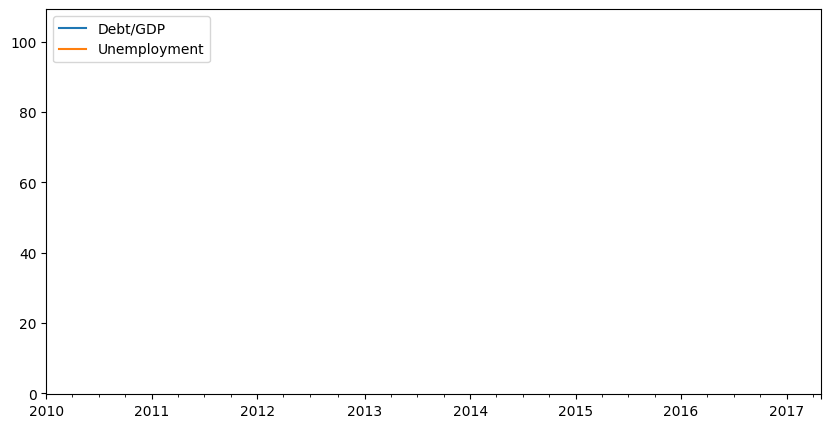

In [46]:
weekly.plot()
plt.show();

In [ ]:
# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

In [48]:
weekly.tail()


,Debt/GDP,Unemployment
2017-04-02,NaN,NaN
2017-04-09,NaN,NaN
2017-04-16,NaN,NaN
2017-04-23,NaN,NaN
2017-04-30,NaN,NaN


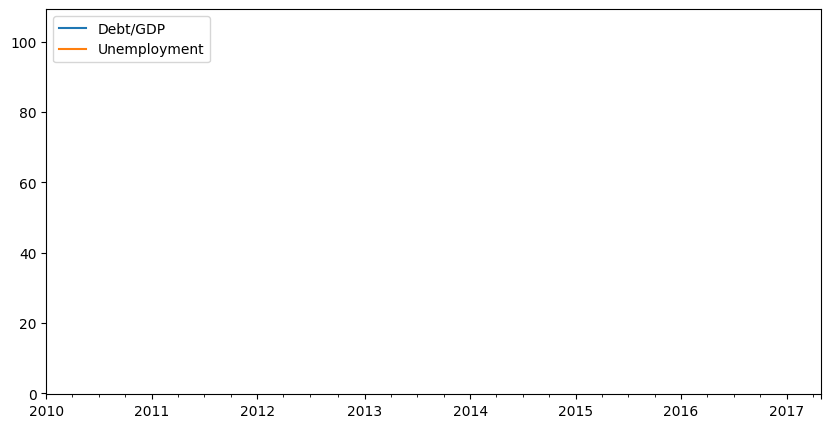

In [49]:

# Plot weekly
weekly.plot()
plt.show();

**Interpolate debt/GDP and compare to unemployment**

Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

In [50]:
# Import & inspect data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 4.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


In [51]:

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())
interpolated.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 4.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.003860,9.8
2010-02-01,87.559397,9.8
2010-03-01,88.114933,9.9
2010-04-01,88.670470,9.9
2010-05-01,89.135103,9.6


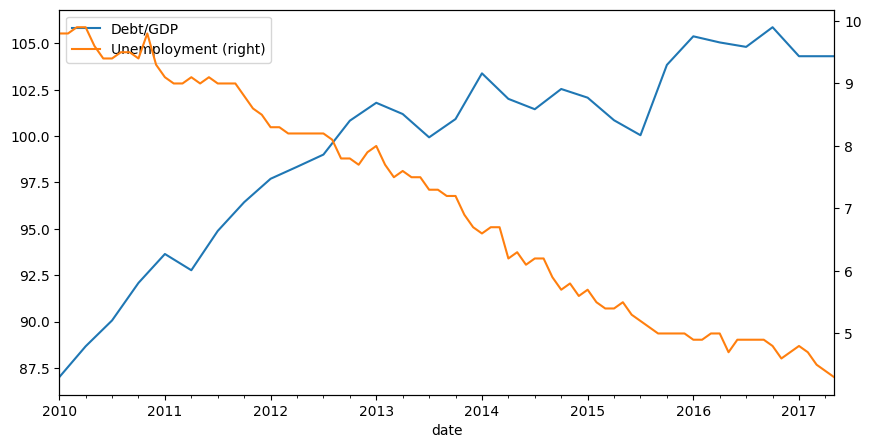

In [52]:

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show();

#### **Downsampling & aggregation**


**Compare weekly, monthly and annual ozone trends for NYC-LA**

Downsample and aggregate time series ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.



In [53]:
# Import and inspect data here
ozone = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\air_quality_data\\ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())
ozone.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


In [54]:
# Import and inspect data here
stocks = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\goog_fb.csv', parse_dates=['date'], index_col='date')

print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


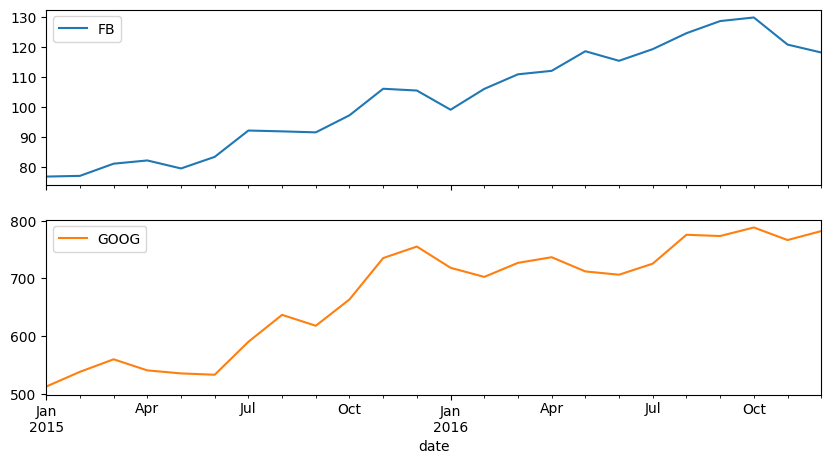

In [55]:
# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show();

**Compare quarterly GDP growth rate and stock returns**

With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

In [56]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [57]:

# Import and inspect djia here
djia = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\djia.csv', parse_dates=['date'], index_col='date')
djia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


In [58]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

In [59]:
# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
# Use pd.concat() to concatenate gdp_growth and djia_quarterly_return 
#  along axis=1, and assign to data. Rename the columns using .columns 
#  and the new labels 'gdp' and 'djia', then .plot() the results.
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

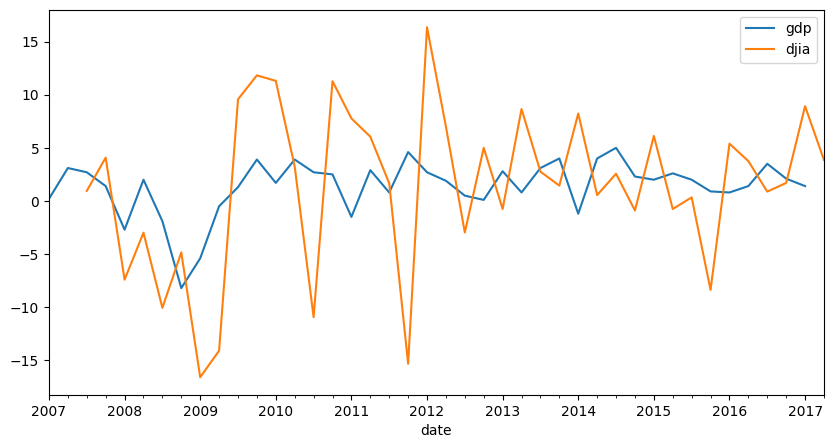

In [60]:
data.plot()
plt.show();

**Visualize monthly mean, median and standard deviation of S&P500 returns**

You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

In [61]:
# Import data here
sp500 = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())
sp500.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [62]:
# Calculate daily returns here
# Convert sp500 to a pd.Series() using .squeeze(), 
#  and apply .pct_change() to calculate daily_returns.
daily_returns = sp500.squeeze().pct_change()
daily_returns

date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
2007-07-05    0.000348
2007-07-06    0.003304
                ...   
2016-12-23    0.001252
2016-12-27    0.002248
2016-12-28   -0.008357
2016-12-29   -0.000293
2016-12-30   -0.004637
Name: SP500, Length: 2395, dtype: float64

In [63]:

# Resample and calculate statistics
# .resample() daily_returns to month-end frequency (alias: 'M'), 
#  and apply .agg() to calculate 'mean', 'median', and 'std'. 
#  Assign the result to stats.
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])
stats

,mean,median,std
date,,,
2007-06-30,NaN,NaN,NaN
2007-07-31,-0.001490,0.000921,0.010908
2007-08-31,0.000668,0.001086,0.015261
2007-09-30,0.001900,0.000202,0.010000
2007-10-31,0.000676,-0.000265,0.008719
...,...,...,...
2016-08-31,-0.000047,-0.000796,0.003562
2016-09-30,-0.000019,-0.000019,0.009146
2016-10-31,-0.000925,-0.001376,0.004160


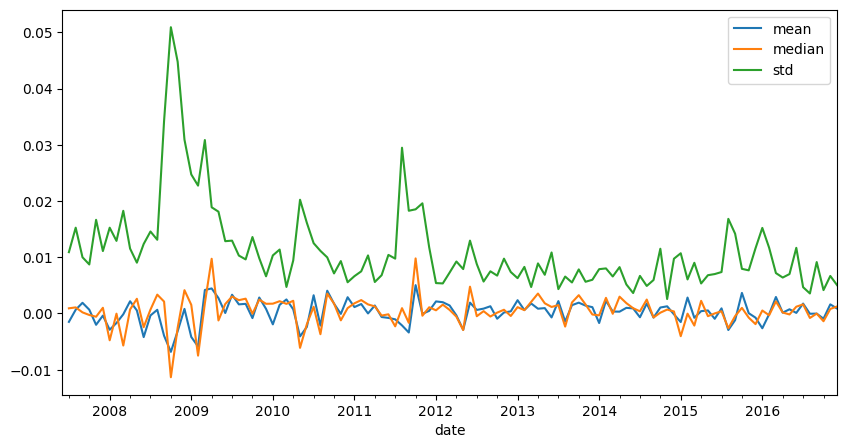

In [64]:

# Plot stats here
stats.plot()
plt.show();

## Chapter 3 - Window Functions: Rolling & Expanding Metrics


**Rolling average air quality since 2010 for new york city**

To practice rolling window functions, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import and inspect ozone data here
data = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\air_quality_data\\ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [ ]:

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling(window='90D').mean()
data['360D'] = data.Ozone.rolling(window='360D').mean()
data.head()

,Ozone,90D,360D
date,,,
2000-01-01,0.004032,0.004032,0.004032
2000-01-02,0.009486,0.006759,0.006759
2000-01-03,0.005580,0.006366,0.006366
2000-01-04,0.008717,0.006954,0.006954
2000-01-05,0.013754,0.008314,0.008314


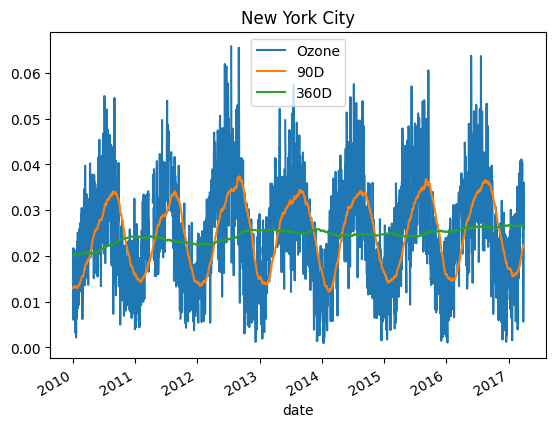

In [ ]:

# Plot data
data['2010':].plot()
plt.title('New York City')
plt.show();

**Rolling 360-day median & std. deviation for nyc ozone data since 2000**

Calculate several rolling statistics using the .agg() method, similar to .groupby().

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling median and standard deviation for the daily average ozone values since 2000.

In [ ]:
# Import and inspect ozone data here
data = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\air_quality_data\\ozone_nyc.csv', parse_dates=['date'], index_col='date')
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [ ]:
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])
rolling_stats.tail()

,mean,std
date,,
2017-03-27,0.026629,0.011599
2017-03-28,0.026583,0.011617
2017-03-29,0.026584,0.011617
2017-03-30,0.026599,0.011613
2017-03-31,0.026607,0.011618


In [ ]:
# Join rolling_stats with ozone data
stats = data.join(rolling_stats)
stats.head()

,Ozone,mean,std
date,,,
2000-01-01,0.004032,NaN,NaN
2000-01-02,0.009486,NaN,NaN
2000-01-03,0.005580,NaN,NaN
2000-01-04,0.008717,NaN,NaN
2000-01-05,0.013754,NaN,NaN


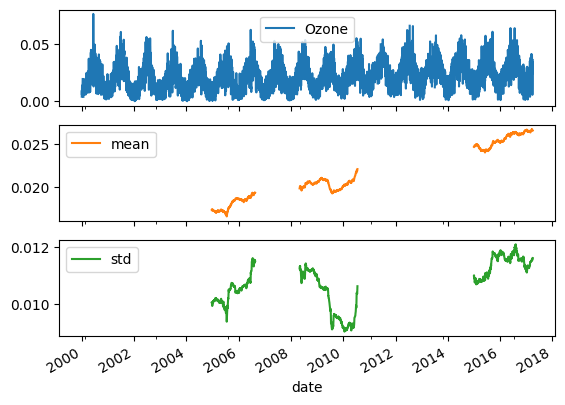

In [ ]:
# Plot stats
stats.plot(subplots=True)
plt.show();

**Rolling quantiles for daily air quality in nyc**

Calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [ ]:
# Import and inspect ozone data here
data = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\air_quality_data\\ozone_nyc.csv', parse_dates=['date'], index_col='date')
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [ ]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB
None


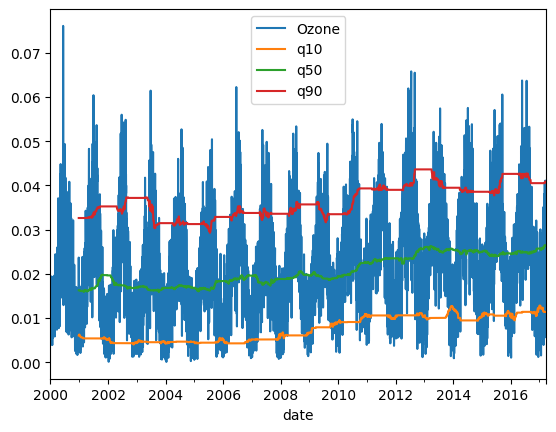

In [ ]:
# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()
plt.show();

**Expanding window functions with pandas**

**Cumulative sum vs .diff()**

Expanding windows allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() method that you came across earlier. To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\google.csv', parse_dates=['Date'], index_col='Date').dropna()
df.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [ ]:
# Calculate differences
differences = df.diff().dropna()
differences.head()

,Close
Date,
2014-01-03,-4.05
2014-01-06,6.15
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49


In [ ]:
# Select start price
start_price = df.first('D')
start_price

C:\Users\yeiso\AppData\Local\Temp\ipykernel_38792\863676461.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  start_price = df.first('D')


,Close
Date,
2014-01-02,556.0


In [ ]:
#este era el codigo original pero no funciono
#cumulative_sum = start_price.append(differences).cumsum()
#cumulative_sum.head()

#en vez de eso... use este!
# Calculate cumulative sum
cumulative_sum = pd.concat([start_price, differences]).cumsum()
cumulative_sum.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [ ]:
# Validate cumulative sum equals data
print(df.equals(cumulative_sum))

True


**Cumulative return on $1,000 invested in google vs apple I**


To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.



In [ ]:
# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\apple_google.csv', parse_dates=['Date'], index_col='Date')
df.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


In [ ]:
# Define your investment
investment = 1000

In [ ]:
# Calculate the daily returns here
returns = df.pct_change()
returns

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345
...,...,...
2017-05-24,-0.002991,0.006471
2017-05-25,0.003456,0.015268
2017-05-26,-0.001690,0.001991


In [ ]:
# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

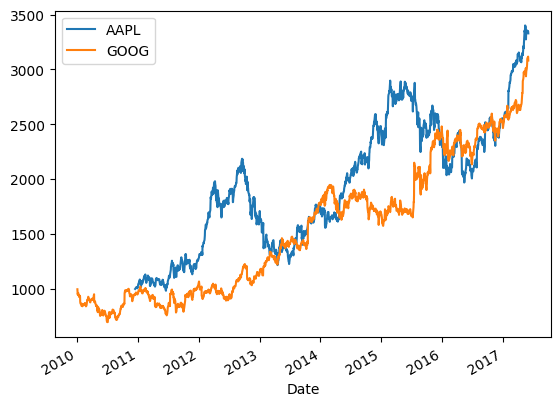

In [ ]:
# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();

**Cumulative return on $1,000 invested in google vs apple II**  

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

In [ ]:
# Import numpy
import numpy as np

In [ ]:

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [ ]:
# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\apple_google.csv', parse_dates=['Date'], index_col='Date')
df.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


In [ ]:
# Calculate daily returns
daily_returns = df.pct_change()
daily_returns.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345


In [ ]:
# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)
rolling_annual_returns.tail()

,AAPL,GOOG
Date,,
2017-05-24,0.528052,0.303415
2017-05-25,0.533333,0.323315
2017-05-26,0.538254,0.320434
2017-05-30,0.569342,0.350998
2017-05-31,0.560049,0.335742


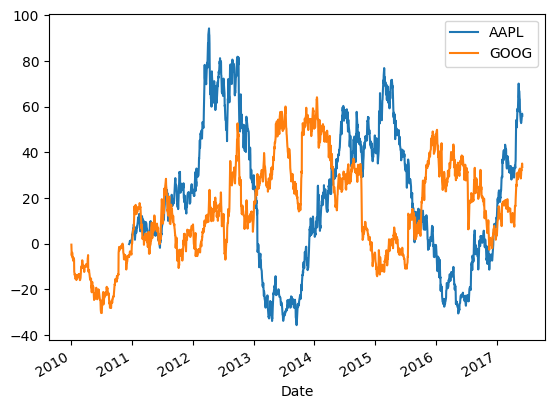

In [ ]:
# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show();

***Case study: S&P500 price simulation***

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.

**Random walk I**
You'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.



In [ ]:
from numpy.random import normal, seed
from scipy.stats import norm

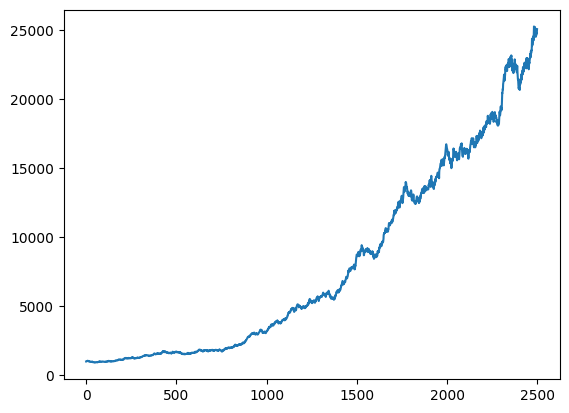

In [ ]:
# Set seed here
seed = 42
np.random.seed(seed)

# Create random_walk
# Use normal to generate 2,500 random returns with the parameters 
#  loc=.001, scale=.01 and assign this to random_walk.
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
# Create random_prices by adding 1 to random_walk 
#  and calculating the cumulative product.
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
# Multiply random_prices by 1,000 
#  and plot the result for a price series starting at 1,000.
random_prices.mul(1000).plot()
plt.show();


**Random walk II**

You'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [ ]:
# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\fb.csv', parse_dates=True, index_col=0, header=None)
df.index.name = 'date'
df.columns = ['price']
df.head()

,price
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


In [ ]:

fb = df['price']
print(type(fb))
fb

<class 'pandas.core.series.Series'>


date
2012-05-17     38.00
2012-05-18     38.23
2012-05-21     34.03
2012-05-22     31.00
2012-05-23     32.00
               ...  
2017-05-24    150.04
2017-05-25    151.96
2017-05-26    152.13
2017-05-30    152.38
2017-05-31    151.46
Name: price, Length: 1267, dtype: float64

In [ ]:
import pandas as pd
from numpy.random import choice, random
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed here
#sometimes using >>> seed(42) <<< could works!
seed = 42
np.random.seed(seed)

In [ ]:
# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()
print(daily_returns)

date
2012-05-18    0.006053
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032188
                ...   
2017-05-24    0.013305
2017-05-25    0.012797
2017-05-26    0.001119
2017-05-30    0.001643
2017-05-31   -0.006038
Name: price, Length: 1266, dtype: float64


In [ ]:

# Get n_obs
n_obs = daily_returns.count()
print(n_obs)

1266


In [ ]:

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)
random_walk

array([-0.00637783, -0.00854701,  0.00833254, ..., -0.00832266,
       -0.00044709, -0.00940827])

In [ ]:
# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

C:\Users\yeiso\AppData\Local\Temp\ipykernel_38792\3014660000.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_walk)


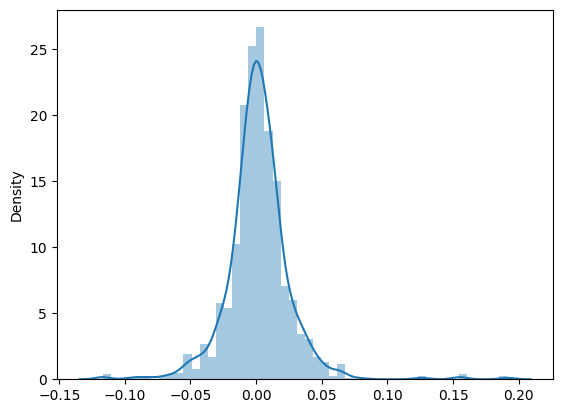

In [ ]:
# Plot random_walk distribution
sns.distplot(random_walk)
plt.show();

**Random walk III**

In this exercise, you’ll complete your random walk simulation using Facebook stock returns over the last five years. You’ll start off with a random sample of returns like the one you’ve generated during the last exercise and use it to create a random stock price path.

In [ ]:
# Select fb start price here
start = fb.price.first('D')
 
# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)
 
# Calculate cumulative product here
random_price = random_price.cumprod()
 
# Insert into fb and plot
fb['random'] = random_price
 
fb.plot()
plt.show()

**Annual return correlations among several stocks** 

You have seen in the video how to calculate correlations, and visualize the result.

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

In [ ]:
# Import data here
df = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\5_stocks.csv', parse_dates=True, index_col=0)
df.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4000 non-null   float64
 1   AMZN    4000 non-null   float64
 2   IBM     4000 non-null   float64
 3   WMT     4000 non-null   float64
 4   XOM     4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


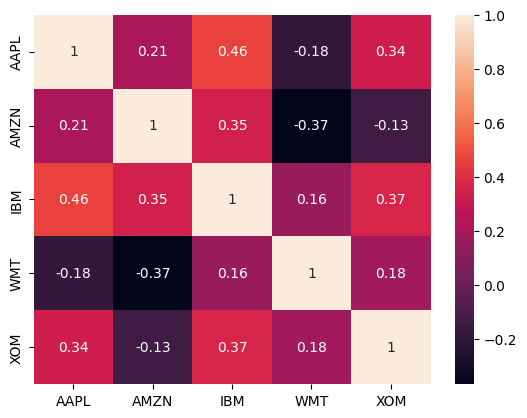

In [ ]:
data = df
# Inspect data here
print(data.info())
 
# Calculate year-end prices here
annual_prices = data.resample('A').last()
 
# Calculate annual returns here
annual_returns = annual_prices.pct_change()
 
# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)
 
# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show();

## Chapter 4 - Putting it all together

In [65]:
#import requiered libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
listings_nyse = pd.read_excel('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\listings.xlsx', sheet_name='nyse', na_values='n/a')
listings_amex = pd.read_excel('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\listings.xlsx', sheet_name='nyse', na_values='n/a')
listings_nasdaq = pd.read_excel('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\listings.xlsx', sheet_name='nyse', na_values='n/a')

c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\yeiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [67]:
listings_nyse['Exchange'] = 'nyse'
listings_amex['Exchange'] = 'amex'
listings_nasdaq['Exchange'] = 'nasdaq'

In [68]:
listings = pd.concat([listings_amex, listings_nasdaq, listings_nyse], axis=0)
listings.reset_index(inplace=True)
listings.drop(['index'], axis=1, inplace=True)
listings['Market Capitalization'] /= 1e6

In [69]:
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year befor 2019
listings = listings[listings['IPO Year'] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9441 entries, 0 to 9440
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           9441 non-null   object 
 1   Company Name           9441 non-null   object 
 2   Last Sale              9237 non-null   float64
 3   Market Capitalization  9441 non-null   float64
 4   IPO Year               4083 non-null   float64
 5   Sector                 6531 non-null   object 
 6   Industry               6531 non-null   object 
 7   Exchange               9441 non-null   object 
dtypes: float64(3), object(5)
memory usage: 590.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2901 entries, WBAI to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2901 non-null   object 
 1   Last Sale              2901 non-null   float64
 2  

**Select and inspect index components**

Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [70]:
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each components
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers,info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Miscellaneous          BABA            275525.000000
Technology             ORCL            181046.096000
Health Care            ABBV            102196.076208
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Consumer Services      LVS              44384.295569
Energy                 PAA              22223.001416
Consumer Durables      WRK              12354.903312
Name: Market Capitalization, dtype: float64
Index(['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                     

**Import index component price information**

Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

In [71]:
tickers = tickers.tolist()


['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF', 'ORCL', 'UPS']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


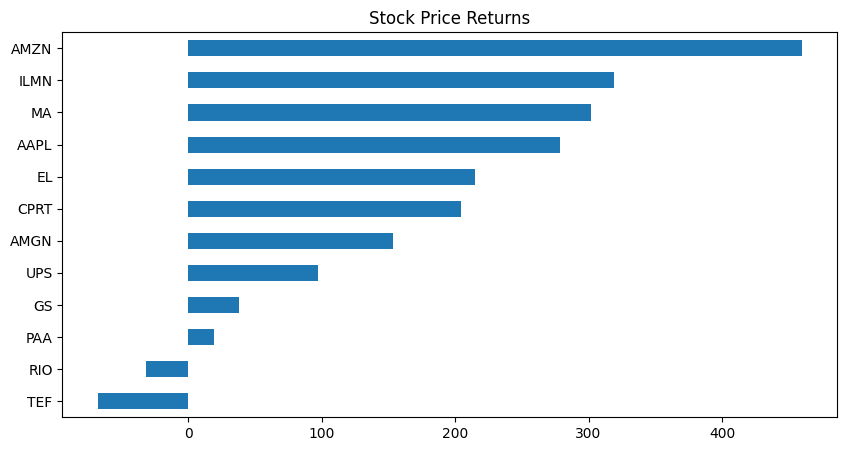

In [72]:
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\stocks_4.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return
price_return.sort_values().plot(kind='barh', title='Stock Price Returns');

**Build a market-cap weighted index**

Calculate number of shares outstanding
The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [73]:
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings[['Market Capitalization', 'Last Sale']].loc[tickers]

# Print the first rows of components
print(components.head(5))

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2901 entries, WBAI to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2901 non-null   object 
 1   Last Sale              2901 non-null   float64
 2   Market Capitalization  2901 non-null   float64
 3   IPO Year               2901 non-null   float64
 4   Sector                 2901 non-null   object 
 5   Industry               2901 non-null   object 
 6   Exchange               2901 non-null   object 
dtypes: float64(3), object(4)
memory usage: 245.9+ KB
None
['RIO', 'GM', 'WRK', 'ABEV', 'LVS', 'PAA', 'GS', 'ABBV', 'BABA', 'TEF', 'ORCL', 'UPS']
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    70431.476895      38.94
RIO                    70431.476895      38.94
RIO                    70431.476895      38.94
GM                     50086.335099      33.39
G

**Create time series of market value**

You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

In [74]:
components['Number of Shares'] = no_shares
print(no_shares.sort_values())

Stock Symbol
WRK       250.403391
WRK       250.403391
WRK       250.403391
GS        397.817439
GS        397.817439
GS        397.817439
PAA       723.404994
PAA       723.404994
PAA       723.404994
LVS       793.994554
LVS       793.994554
LVS       793.994554
UPS       869.297154
UPS       869.297154
UPS       869.297154
GM       1500.039985
GM       1500.039985
GM       1500.039985
ABBV     1593.576738
ABBV     1593.576738
ABBV     1593.576738
RIO      1808.717948
RIO      1808.717948
RIO      1808.717948
BABA     2500.000000
BABA     2500.000000
BABA     2500.000000
ORCL     4114.684000
ORCL     4114.684000
ORCL     4114.684000
TEF      5037.804990
TEF      5037.804990
TEF      5037.804990
ABEV    15701.102928
ABEV    15701.102928
ABEV    15701.102928
dtype: float64


In [75]:
no_shares_no_duplicates = no_shares.drop_duplicates()
print(no_shares_no_duplicates.sort_values())


Stock Symbol
WRK       250.403391
GS        397.817439
PAA       723.404994
LVS       793.994554
UPS       869.297154
GM       1500.039985
ABBV     1593.576738
RIO      1808.717948
BABA     2500.000000
ORCL     4114.684000
TEF      5037.804990
ABEV    15701.102928
dtype: float64


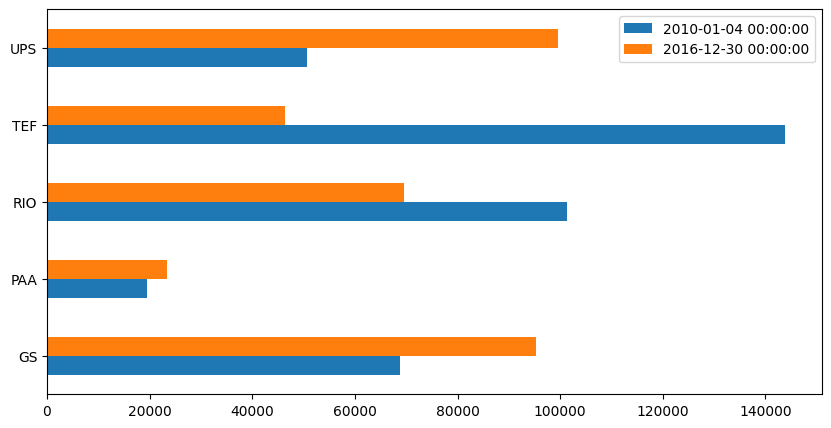

In [76]:
# Create the series of market cap per ticker
market_cap = stock_prices.mul(no_shares_no_duplicates)

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).dropna().plot(kind='barh');
plt.savefig('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\images\\market_cap.png')
plt.show()



**Calculate & plot the composite index**

By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [77]:
market_cap_series = market_cap[pd.concat([first_value, last_value], axis=1).dropna().index.tolist()]


In [78]:
market_cap_series


,GS,PAA,RIO,TEF,UPS
Date,,,,,
2010-01-04,68854.242342,19531.934838,101342.466626,143829.332464,50575.708420
2010-01-05,70071.563705,19748.956336,102916.051241,143728.576365,50662.638135
2010-01-06,69323.666920,19741.722286,106063.220471,142217.234868,50288.840359
2010-01-07,70680.224387,19502.998638,106081.307650,139799.088472,49906.349611
2010-01-08,69343.557792,19568.105088,107256.974316,138892.283574,52305.609756
...,...,...,...,...,...
2016-12-23,95862.068276,24168.960850,68948.328178,46196.671758,100812.390949
2016-12-27,96096.780565,24226.833249,69364.333306,45995.159559,100951.478494
2016-12-28,95734.766695,23908.535052,70304.866639,45491.379060,100143.032141


Date
2010-01-04    384133.684691
2010-01-05    387127.785783
2010-01-06    387634.684904
2010-01-07    385969.968759
2010-01-08    387366.530527
                  ...      
2016-12-23    335988.420011
2016-12-27    336634.585172
2016-12-28    335582.579586
2016-12-29    334547.192279
2016-12-30    334183.456947
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.779442
2010-01-06    100.911402
2010-01-07    100.478033
2010-01-08    100.841594
                 ...    
2016-12-23     87.466534
2016-12-27     87.634748
2016-12-28     87.360883
2016-12-29     87.091345
2016-12-30     86.996655
Length: 1762, dtype: float64


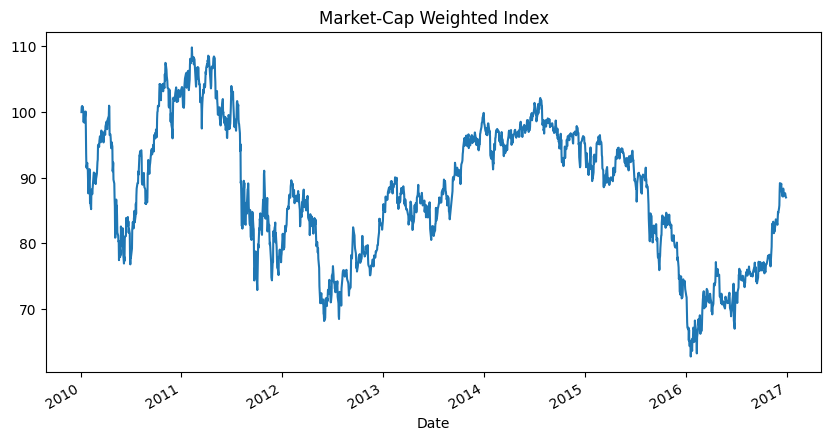

In [79]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show();


**Evaluate index performance**

- Index return:
    - Total index return
    - Contribution by component

- Performance vs Benchmark
    -Total period return    
    - Rolling returns for sub periods

**Calculate the contribution of each stock to the index**

You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.

-13.003344859886202
Stock Symbol
WRK     0.003813
WRK     0.003813
WRK     0.003813
PAA     0.006858
PAA     0.006858
PAA     0.006858
LVS     0.013697
LVS     0.013697
LVS     0.013697
GM      0.015457
GM      0.015457
GM      0.015457
TEF     0.016853
TEF     0.016853
TEF     0.016853
RIO     0.021736
RIO     0.021736
RIO     0.021736
ABEV    0.027232
ABEV    0.027232
ABEV    0.027232
GS      0.027417
GS      0.027417
GS      0.027417
UPS     0.027831
UPS     0.027831
UPS     0.027831
ABBV    0.031539
ABBV    0.031539
ABBV    0.031539
ORCL    0.055872
ORCL    0.055872
ORCL    0.055872
BABA    0.085029
BABA    0.085029
BABA    0.085029
Name: Market Capitalization, dtype: float64


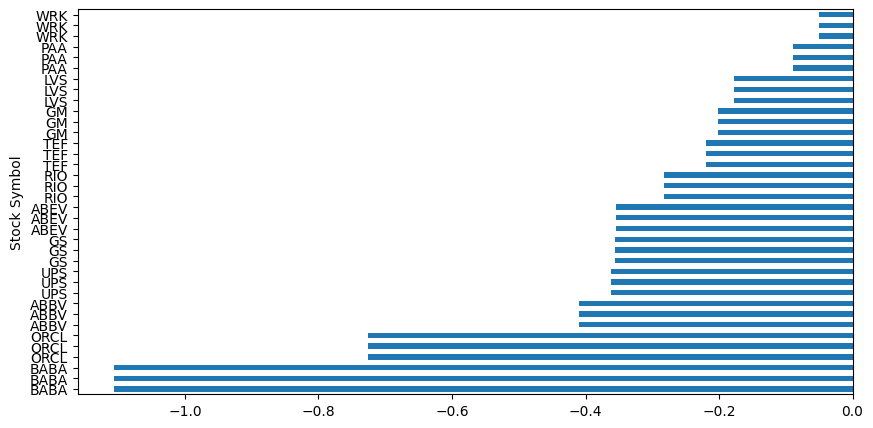

In [80]:
# Calculate and print the index return here
index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights , and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

# Calculate and plot the distribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show();

**Compare index performance against benchmark I**

The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

In [81]:
djia = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\djia2.csv', parse_dates=['DATE'], index_col='DATE')['DJIA']


Index   -13.003345
DJIA     86.722172
dtype: float64


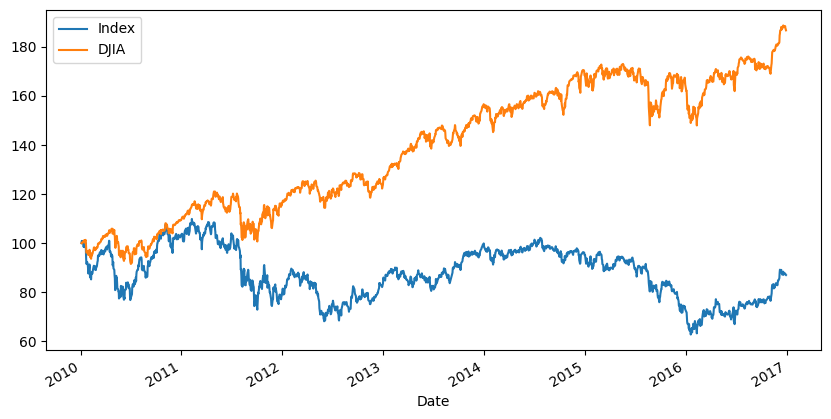

In [ ]:
# Convert index series to dataframe here
data = index.to_frame('Index')

# Normalize djia series and add as new column to data
djia = djia.div(djia.iloc[0]).mul(100)
data['DJIA'] = djia

# Print total return for both index and djia
print((data.iloc[-1] / data.iloc[0] - 1) * 100)

# Plot both series
data.plot()
plt.show();

**Compare index performance against benchmark II**

The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2007-01-01 to 2017-04-01
Freq: QS-OCT
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     41 non-null     float64
 1   djia    40 non-null     float64
dtypes: float64(2)
memory usage: 1008.0 bytes
None
            gdp      djia
date                     
2007-01-01  0.2       NaN
2007-04-01  3.1       NaN
2007-07-01  2.7  0.945735
2007-10-01  1.4  4.079072
2008-01-01 -2.7 -7.407889


C:\Users\yeiso\AppData\Local\Temp\ipykernel_19956\4027336615.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)


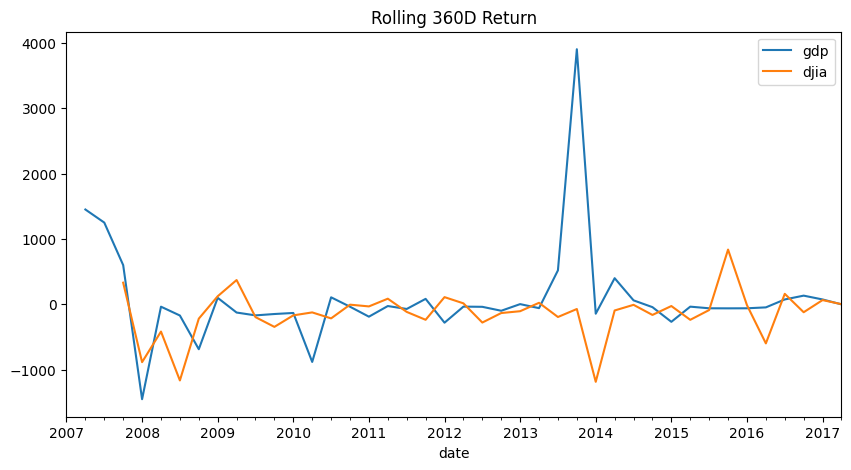

In [82]:
print(data.info())
print(data.head(5))

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return');
plt.show()

**Index correlation & exporting to Excel**

Visualize your index constituent correlations
To better understand the characteristics of your index constituents, you can calculate the return correlations.

Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!

In [83]:
stock_prices = pd.read_csv('C:\\Users\\yeiso\\OneDrive - Douglas College\\0. DOUGLAS COLLEGE\\3. Fund Machine Learning\\0. Python Course DataCamp\\Course-fundamentals-of-Machine-Learning\\9. Manipulating Time Series Data in Python\\datasets\\stock_data\\stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.head())

             AAPL   AMGN    AMZN  CPRT     EL      GS   ILMN     MA    PAA  \
Date                                                                         
2010-01-04  30.57  57.72  133.90  4.55  24.27  173.08  30.55  25.68  27.00   
2010-01-05  30.63  57.22  134.69  4.55  24.18  176.14  30.35  25.61  27.30   
2010-01-06  30.14  56.79  132.25  4.53  24.25  174.26  32.22  25.56  27.29   
2010-01-07  30.08  56.27  130.00  4.50  24.56  177.67  32.77  25.39  26.96   
2010-01-08  30.28  56.77  133.52  4.52  24.66  174.31  33.15  25.40  27.05   

              RIO    TEF    UPS  
Date                             
2010-01-04  56.03  28.55  58.18  
2010-01-05  56.90  28.53  58.28  
2010-01-06  58.64  28.23  57.85  
2010-01-07  58.65  27.75  57.41  
2010-01-08  59.30  27.57  60.17  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726 

C:\Users\yeiso\AppData\Local\Temp\ipykernel_19956\2553049458.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = stock_prices.pct_change()


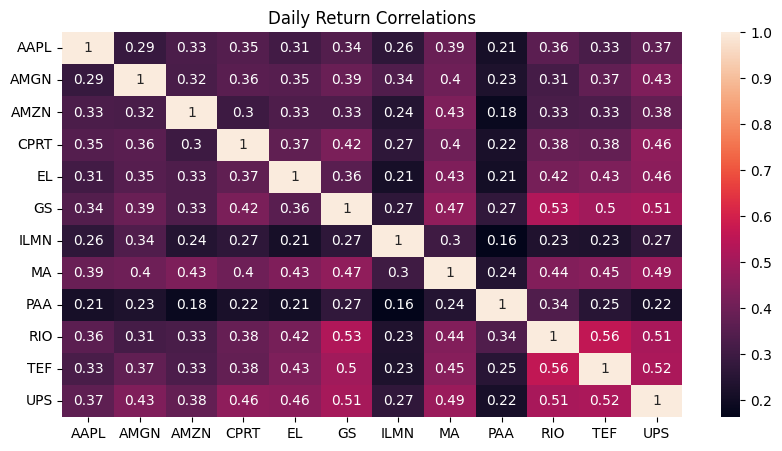

In [84]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the dail returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True)
plt.title('Daily Return Correlations')
plt.show();

**Save your analysis to multiple excel worksheets**

Now that you have completed your analysis, you may want to save all results into a single Excel workbook.

Let's practice exporting various DataFrame to multiple Excel worksheets.

In [85]:
index = index.to_frame('Index')


In [86]:
print(index.info())
print(stock_prices.info())

# Join index to stock_prices, and inspect the result
data = stock_prices.join(index)
print(data.info())

# Create index & stock price returns
returns = data.pct_change()

#esta es la forma original.... pero NO funciono!
# Export data and data as returns to excel
#with pd.ExcelWriter('data.xls') as writer:
#    data.to_excel(writer, sheet_name='data')
#    returns.to_excel(writer, sheet_name='returns')


# Export data and data as returns to Excel with 'xls' format using 'openpyxl' engine
with pd.ExcelWriter('data.xls', engine='openpyxl') as writer:
    data.to_excel(writer, sheet_name='data', engine='openpyxl')
    returns.to_excel(writer, sheet_name='returns', engine='openpyxl')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None
<class 'pandas.core.frame.Da

C:\Users\yeiso\AppData\Local\Temp\ipykernel_19956\1964733718.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change()
